<a href="https://colab.research.google.com/github/anikpuranik/Natural-Language-Processing/blob/master/Machine%20Translation/LstmNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
tf.test.gpu_device_name() 

'/device:GPU:0'

#####**Importing Libraries**

In [2]:
import re
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding, RepeatVector
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

##### **Loading dataset**

In [3]:
filename = 'drive/My Drive/dataset/deu.txt'
with open(filename, mode="r", encoding="utf-8") as f:
    text = f.read()

In [4]:
text = text.strip().split("\n")
data = [i.split("\t") for i in text]
data

[['Go.',
  'Geh.',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
 ['Hi.',
  'Hallo!',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
 ['Hi.',
  'Grüß Gott!',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
 ['Run!',
  'Lauf!',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #941078 (Fingerhut)'],
 ['Run.',
  'Lauf!',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #4008918 (JSakuragi) & #941078 (Fingerhut)'],
 ['Wow!',
  'Potzdonner!',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #52027 (Zifre) & #2122382 (Pfirsichbaeumchen)'],
 ['Wow!',
  'Donnerwetter!',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #52027 (Zifre) & #2122391 (Pfirsichbaeumchen)'],
 ['Fire!',
  'Feuer!',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #1829639 (Spamster) & #1958697 (Tamy)'],
 ['Help!',
  'Hilfe!',
  'CC-BY 2.0 (France) Attribution: tatoeba.org #435084 (lukaszpp) & #

In [5]:
deu_eng = np.array(data)
deu_eng

array([['Go.', 'Geh.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi.', 'Hallo!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Hi.', 'Grüß Gott!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ...,
       ["If someone who doesn't know your background says that you sound like a native speaker, it means they probably noticed something about your speaking that made them realize you weren't a native speaker. In other words, you don't really sound like a native speaker.",
        'Wenn jemand Fremdes dir sagt, dass du dich wie ein Muttersprachler anhörst, bedeutet das wahrscheinlich: Er hat etwas an deinem Sprechen bemerkt, dass dich als Nicht-Muttersprachler verraten hat. Mit anderen Worten: Du hörst dich nicht wirklich wie ein Muttersprachler an.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #953936 (CK) & #3807493 

In [6]:
deu_eng = deu_eng[:50000, :]

##### **Text Preprocessing**

In [7]:
deu_eng[0]

array(['Go.', 'Geh.',
       'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
      dtype='<U537')

In [8]:
import string
deu_eng[0][0].translate(str.maketrans('','',string.punctuation))

'Go'

In [9]:
deu_eng[:,0] = [s.translate(str.maketrans('','', string.punctuation)) for s in deu_eng[:, 0]]
deu_eng[:,1] = [s.translate(str.maketrans('','', string.punctuation)) for s in deu_eng[:, 1]]
deu_eng

array([['Go', 'Geh',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi', 'Hallo',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Hi', 'Grüß Gott',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ...,
       ['No one encouraged her', 'Niemand ermutigte sie',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #40334 (Swift) & #370461 (Wolf)'],
       ['No one has that right', 'Niemand hat dieses Recht',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2891740 (CK) & #6176735 (sprachensprech)'],
       ['No one has that right', 'Dieses Recht hat niemand',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2891740 (CK) & #6176738 (sprachensprech)']],
      dtype='<U537')

In [10]:
for i in tqdm(range(len(deu_eng))):
    deu_eng[i,0] = deu_eng[i,0].lower()
    deu_eng[i,1] = deu_eng[i,1].lower()
    
deu_eng

100%|██████████| 50000/50000 [00:00<00:00, 203733.78it/s]


array([['go', 'geh',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['hi', 'hallo',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['hi', 'grüß gott',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ...,
       ['no one encouraged her', 'niemand ermutigte sie',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #40334 (Swift) & #370461 (Wolf)'],
       ['no one has that right', 'niemand hat dieses recht',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2891740 (CK) & #6176735 (sprachensprech)'],
       ['no one has that right', 'dieses recht hat niemand',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2891740 (CK) & #6176738 (sprachensprech)']],
      dtype='<U537')

##### **Text to Sequence Conversion**

In [11]:
tokenizer = Tokenizer()
lines = deu_eng[:, 0]
tokenizer.fit_on_texts(lines)
eng_tokenizer = tokenizer
eng_vocab_size = len(eng_tokenizer.word_index)+1
eng_vocab_size

6243

In [12]:
tokenizer = Tokenizer()
lines = deu_eng[:, 1]
tokenizer.fit_on_texts(lines)
deu_tokenizer = tokenizer
deu_vocab_size = len(deu_tokenizer.word_index)+1
deu_vocab_size

10329

In [13]:
train, test = train_test_split(deu_eng, test_size=0.2)

In [14]:
def encode_sequence(tokenizer, length, lines):
    seq = tokenizer.texts_to_sequences(lines)
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

In [15]:
train_X = encode_sequence(deu_tokenizer, 8, train[:, 1])
train_Y = encode_sequence(eng_tokenizer, 8, train[:, 0])
test_X = encode_sequence(deu_tokenizer, 8, test[:, 1])
test_Y = encode_sequence(eng_tokenizer, 8, test[:, 1])

In [16]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((40000, 8), (40000, 8), (10000, 8), (10000, 8))

# **Model Preparation**

##### **Model Preparation 1**

In [48]:
model = Sequential()
model.add(Embedding(deu_vocab_size, 512, input_length=8, mask_zero=True))
model.add(Bidirectional(LSTM(512)))
model.add(RepeatVector(8))
model.add(Bidirectional(LSTM(512, return_sequences=True)))
model.add(Dense(eng_vocab_size, activation='softmax'))

In [49]:
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

In [50]:
checkpoint1 = ModelCheckpoint(filename+"Bidirectional", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [51]:
history1 = model.fit(train_X, train_Y, 
                     epochs=8, batch_size=256, validation_split=0.2,
                     #callbacks=[checkpoint1], 
                     verbose=1)

Epoch 1/8
125/125 [==============================] - 12s 97ms/step - loss: 2.9847 - val_loss: 2.5165
Epoch 2/8
125/125 [==============================] - 10s 79ms/step - loss: 2.3082 - val_loss: 2.1202
Epoch 3/8
125/125 [==============================] - 10s 79ms/step - loss: 1.8989 - val_loss: 1.8169
Epoch 4/8
125/125 [==============================] - 10s 79ms/step - loss: 1.5641 - val_loss: 1.5806
Epoch 5/8
125/125 [==============================] - 10s 79ms/step - loss: 1.3110 - val_loss: 1.4396
Epoch 6/8
125/125 [==============================] - 10s 79ms/step - loss: 1.1098 - val_loss: 1.3391
Epoch 7/8
125/125 [==============================] - 10s 79ms/step - loss: 0.9496 - val_loss: 1.2717
Epoch 8/8
125/125 [==============================] - 10s 79ms/step - loss: 0.8170 - val_loss: 1.2475


In [52]:
preds1 = model.predict_classes(test_X.reshape((test_X.shape[0],test_X.shape[1])))

##### **Model Preparation 2**

In [31]:
model = Sequential()
model.add(Embedding(deu_vocab_size, 512, input_length=8, mask_zero=True))
model.add(LSTM(512))
model.add(RepeatVector(8))
model.add(LSTM(512, return_sequences=True))
model.add(Dense(eng_vocab_size, activation='softmax'))

In [33]:
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

In [34]:
checkpoint2 = ModelCheckpoint(filename+"RNN", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [36]:
history2 = model.fit(train_X, train_Y, 
                     epochs=20, batch_size=256, validation_split=0.2,
                     #callbacks=[checkpoint2], 
                     verbose=1)

Epoch 1/20
125/125 [==============================] - 8s 60ms/step - loss: 2.9879 - val_loss: 2.7484
Epoch 2/20
125/125 [==============================] - 7s 53ms/step - loss: 2.5958 - val_loss: 2.4625
Epoch 3/20
125/125 [==============================] - 7s 56ms/step - loss: 2.3260 - val_loss: 2.2417
Epoch 4/20
125/125 [==============================] - 7s 53ms/step - loss: 2.0910 - val_loss: 2.0769
Epoch 5/20
125/125 [==============================] - 7s 54ms/step - loss: 1.8916 - val_loss: 1.9166
Epoch 6/20
125/125 [==============================] - 7s 54ms/step - loss: 1.7185 - val_loss: 1.8078
Epoch 7/20
125/125 [==============================] - 7s 54ms/step - loss: 1.5676 - val_loss: 1.7038
Epoch 8/20
125/125 [==============================] - 7s 54ms/step - loss: 1.4315 - val_loss: 1.6137
Epoch 9/20
125/125 [==============================] - 7s 54ms/step - loss: 1.3093 - val_loss: 1.5585
Epoch 10/20
125/125 [==============================] - 7s 53ms/step - loss: 1.1972 - val_lo

In [37]:
preds2 = model.predict_classes(test_X.reshape((test_X.shape[0],test_X.shape[1])))

##### **Visualizing loss**

In [38]:
from matplotlib import pyplot as plt

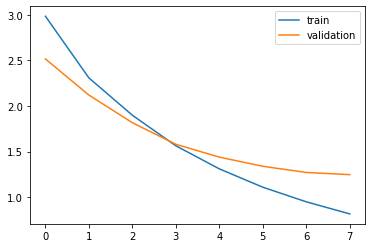

In [53]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['train', 'validation'])
plt.show()

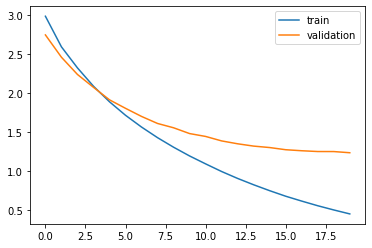

In [40]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['train', 'validation'])
plt.show()

##### **Testing Model**

In [41]:
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

In [54]:
preds_text1 = []
for i in tqdm(preds1):
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], eng_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], eng_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 

    preds_text1.append(' '.join(temp))

100%|██████████| 10000/10000 [01:38<00:00, 101.59it/s]


In [55]:
pred_df1 = pd.DataFrame({'actual' : test[:,0], 'predicted1' : preds_text1})

In [44]:
preds_text2 = []
for i in tqdm(preds2):
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], eng_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], eng_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 

    preds_text2.append(' '.join(temp))

100%|██████████| 10000/10000 [01:33<00:00, 106.61it/s]


In [57]:
pred_df1['predicted2'] = pd.DataFrame(preds_text2)
pred_df1.sample(20)

,actual,predicted1,predicted2
8496,when do you study,when do you study,when are you study
1579,i was good,i was good,i was good
1515,did you meet her,have you warn her,did you meet her
5215,youre such a weirdo,you really be,you had no of
6144,im from the fbi,im the,im on my
1001,you cant miss it,you cant miss it,you cant miss it
266,try to catch me,you can,ill can if you
7769,they ignored me,they avoiding me,they amuse me
2053,take my horse,take my horse,take my horse
322,tom corrected it,tom tries it,tom is it
